In [2]:
#
# Developing Generic Multi-dimension Optimiser
# WKJEE 02.2025
#
#

/Users/woongkyujee/miniconda3/lib/python3.10/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 156
         Gradient evaluations: 48
fun          1.970040888418443e-11
jac          [ 2.80109246e-06 -1.35901388e-06]
hess_i       [[0.50407838 1.00665309]
 [1.00665309 2.0158482 ]]
nfev         156
njev         48
status       2
succes       False
messag       Desired error not necessarily achieved due to precision loss.
x            [0.99999556 0.99999111]
nit          16
[[2, 1], array([1.0201081, 1.244769 ]), array([0.93013856, 0.8930827 ]), array([0.91261286, 0.82806523]), array([0.91576574, 0.83920741]), array([0.91676102, 0.84059082]), array([0.91910181, 0.84448486]), array([0.92398988, 0.85299973]), array([0.93414956, 0.87113422]), array([0.9559649 , 0.91088967]), array([0.96936371, 0.93651828]), array([0.98389333, 0.96615234]), array([0.99286424, 0.98555203]), array([0.99857363, 0.99706584]), array([0.99989905, 0.99979181]), array([0.99999344, 0.9999868 ]), array([0.99999556, 0.9

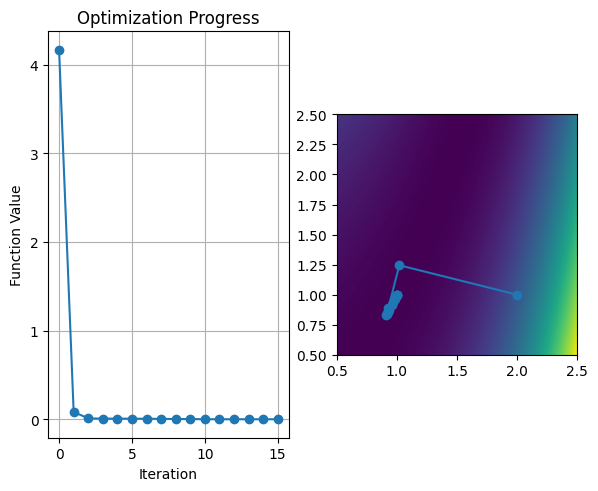

SystemExit: 

/Users/woongkyujee/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [46]:
from scipy.optimize import minimize
import numpy as np
import sys

#
# Rosenbrock function Objective function
#

# Input Parameters
# a = 1
# b = 100
# GM = (1,1)
params = (1, 100)

def rosenbrock(var,params):
    x, y = var     # <tuple>
    a, b = params  # <tuple> # Getting Multiple Input Parameters
    return (a - x)**2 + b * (y - x**2)**2

# store optimisation profile
optprofile = []
xkprofile = []

def record_optprofile(xk):
    optprofile.append(rosenbrock(xk,params)) # xk is automatic -> paramter at kth iteration
    xkprofile.append(xk)

# Initial guess
x0 = [2,1]  
#x0 = [3,3]  
# Tolerance
xtol = 1e-6

res = minimize(
    rosenbrock,
    x0,
    args=(params,),
    method='BFGS',
    #method='CG',
    tol = xtol,
    options={'disp': True},
    callback=record_optprofile, # record_optprofile <callable> optional
    )

for key,value in zip(res.keys(),res.values()):
    print(f'{key:12.6s} {value}') 

#
# show opt profile
#
fig, ax = plt.subplots(1,2)
cm = 1/2.54
xl, yl = 16, 12
fig.set_size_inches((xl*cm,yl*cm))
plt.subplots_adjust(
left = 0.10,
bottom = 0.1,
right = 0.94,
top = 0.96,
wspace = 0.200,
hspace = 0.0
)
fs, lfs = 12, 14 #fonts

ax[0].plot(optprofile, marker='o', linestyle='-')
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Function Value")
ax[0].set_title("Optimization Progress")
ax[0].grid()



xkprofile.insert(0,x0)

xkprofile_x = [ p[0] for p in xkprofile ]
xkprofile_y = [ p[1] for p in xkprofile ]
print(xkprofile)
print(xkprofile_x)
print(xkprofile_y)


ax[1].plot(xkprofile_x,xkprofile_y,marker='o', linestyle='-')

# ------------------------------------------------------------
# Set parameters for the Rosenbrock function
params = (1, 100)  # a = 1, b = 100

# Create a grid of x and y values
x_range = np.linspace(0.5, 2.5, 1000)  # X values from -2 to 2
y_range = np.linspace(0.5, 2.5, 1000)  # Y values from -1 to 3

# Create meshgrid of X and Y values
X, Y = np.meshgrid(x_range, y_range)

# Initialize the Z values (the Rosenbrock function)
Z = np.zeros_like(X)

# Compute the function values over the grid
for i in range(len(x_range)):
    for j in range(len(y_range)):
        Z[j, i] = rosenbrock([X[j, i], Y[j, i]], params)

ax[1].imshow(Z,
    extent=[x_range.min(), x_range.max(), y_range.min(), y_range.max()],
    origin='lower',
    cmap='viridis',
    )




plt.show()

sys.exit()
    
#print("Optimized x:", res.x[0])  # Optimized x
#print("Fixed y:", res.x[1])  # Should remain 2
#print("Function value at minimum:", res.fun)

In [17]:
#
# Partial Minimisation
#
# * Bound Method - available for 'L-BFGS-B' optimiser
#

fun          2.335765865451638e-12
jac          [6.52192248e-05            nan]
nfev         30
njev         15
nit          14
status       0
messag       CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
x            [1.00000008 1.        ]
succes       True
hess_i       None
  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 2.335765865451638e-12
        x: [ 1.000e+00  1.000e+00]
      nit: 14
      jac: [ 6.522e-05        nan]
     nfev: 30
     njev: 15
 hess_inv: None


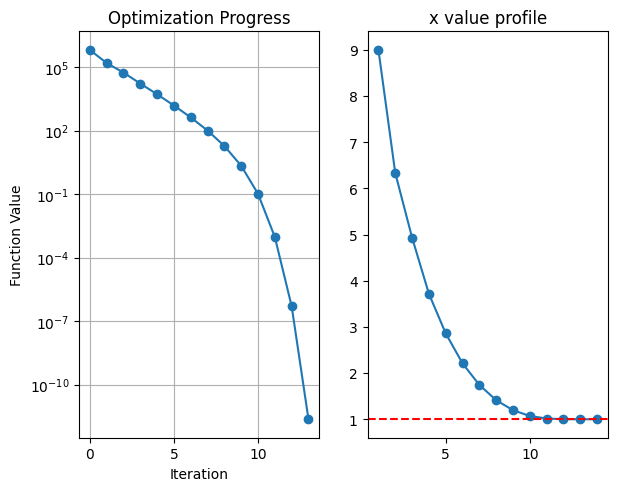

SystemExit: 

In [44]:
from scipy.optimize import minimize
import numpy as np
import sys

#
# Rosenbrock function Objective function
#

# Input Parameters
# a = 1
# b = 100
# GM = (1,1)
params = (1, 100)

# Original ObjectiveF
def rosenbrock(var,params):
    x, y = var     # <tuple>
    a, b = params  # <tuple>
    return (a - x)**2 + b * (y - x**2)**2

# store optimisation profile
optprofile = []
xkprofile = []

def record_optprofile(xk):
    optprofile.append(rosenbrock(xk,params)) # xk is automatic -> paramter at kth iteration
    xkprofile.append(xk)
    
# Initial guess
x0 = [10, 1]  
# Tolerance
xtol = 1e-6

#
# Define Parameter Bound
#
bounds = [(None,None),tuple( [x0[1] for i in range(len(x0))] )]
#         ^^^^^^^^^^^ ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#         No Bound    Bound x0[1] value i.e., fix 'y' variable
#


res = minimize(
    rosenbrock,
    x0,
    args=(params,),
    bounds=bounds,
    method='L-BFGS-B',
    tol = xtol,
    options={'disp': True},
    callback=record_optprofile,
    )

for key,value in zip(res.keys(),res.values()):
    print(f'{key:12.6s} {value}') 
print(res)

# sort out x, y profiles from xkprofile
xlist = [ p[0] for p in xkprofile ]
ylist = [ p[1] for p in xkprofile ] 
step  = [ i+1 for i in range(len(xkprofile)) ]
stepxlist = np.array([ [s,x] for s,x in zip(step,xlist) ])
stepxlist = [ [s,x] for s,x in zip(step,xlist) ]
#print(stepxlist)
#print(step)

#
# show opt profile
#

fig, ax = plt.subplots(1,2)
cm = 1/2.54
xl,yl = 16,12
fig.set_size_inches((xl*cm,yl*cm))
plt.subplots_adjust(
left = 0.10,
bottom = 0.1,
right = 0.94,
top = 0.96,
wspace = 0.200,
hspace = 0.0
)
fs, lfs = 12, 14 #fonts

ax[0].plot(optprofile, marker='o', linestyle='-')
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Function Value")
ax[0].set_title("Optimization Progress")
ax[0].set_yscale('log')
ax[0].grid()

#print(type(optprofile),type(stepxlist))
#print(stepxlist)
ax[1].plot(step,xlist, marker='o', linestyle='-')
ax[1].axhline(y=1,linestyle='--',color='r')
ax[1].set_title('x value profile')

plt.show()

# print function values
#for item in optprofile:
#    print(item)


sys.exit()

In [49]:
#
# Model Demo 0.1
#
# WKJEE. 02.2025
#

from scipy.optimize import minimize

# ---------------------------------------------
# * SECTION 1
# READ Input Data
#
# Exp. sets
#
# possibly has a format of ...
#
# Q = fExp( Cyc, Cr, T )
# ---------------------------------------------
#
# Actually from this point, it requires some paper work! hand-writings
#




# * SECTION 1 END -------------------------------















Estimated coefficients: [ 2.01545155 -2.96735455  3.03113181 -1.25077955]
True coefficients: [2, -3, 4, -5]


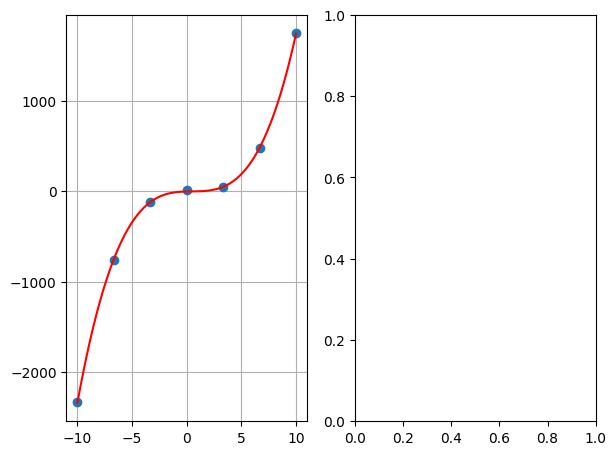

In [68]:
#
# parameter fitting pattern practice
# 

import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt

dp_cnt = 7
rand_norm_std = 10
np.random.seed(42)
#
# Generate synthetic data from a known polynomial
# y = 2x^3 - 3x^2 + 4x - 5
#
np.random.seed(42)
#
# Generate 50 points between -10 and 10
#
x_data = np.linspace(-10, 10, dp_cnt) 
true_coeffs = [2, -3, 4, -5]  # True values of [a, b, c, d]
y_data = np.polyval(true_coeffs, x_data) + np.random.normal(0, rand_norm_std, size=len(x_data))  # Add noise


# Define the loss function to minimize
def loss(params, x, y):
    a, b, c, d = params
    y_pred = a * x**3 + b * x**2 + c * x + d
    return np.sum((y - y_pred) ** 2)  # Sum of squared errors (SSE)

# Initial guess for [a, b, c, d]
initial_guess = [1, 1, 1, 1]

# Minimize the loss function
result = opt.minimize(loss, initial_guess, args=(x_data, y_data))

# Extract optimized coefficients
optimized_coeffs = result.x

print("Estimated coefficients:", optimized_coeffs)
print("True coefficients:", true_coeffs)

#
# profile by the fitted data
#
dp_cnt_val = dp_cnt * 10
x_val_data = np.linspace(-10, 10, dp_cnt_val)
y_val_data = np.polyval(optimized_coeffs,x_val_data)


fig, ax = plt.subplots(1,2)
cm = 1/2.54
xl,yl = 16,12
fig.set_size_inches((xl*cm,yl*cm))
plt.subplots_adjust(
left = 0.10,
bottom = 0.1,
right = 0.94,
top = 0.96,
wspace = 0.200,
hspace = 0.0
)
fs, lfs = 12, 14 #fonts

ax[0].plot(x_data,y_data, marker='o',linestyle='')
#ax[0].set_xlabel("Iteration")
#ax[0].set_ylabel("Function Value")
#ax[0].set_title("Optimization Progress")
#ax[0].set_yscale('log')
ax[0].grid()

# add by the fitted dataset
ax[0].plot(x_val_data,y_val_data,linestyle='-',color='r')


#print(type(optprofile),type(stepxlist))
#print(stepxlist)
#ax[1].plot(step,xlist, marker='o', linestyle='-')
#ax[1].axhline(y=1,linestyle='--',color='r')
#ax[1].set_title('x value profile')

plt.show()

/Users/woongkyujee/miniconda3/lib/python3.10/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 0.237709
         Iterations: 161
         Function evaluations: 2253
         Gradient evaluations: 249
jac :  [-3.04668129e+04  3.03054369e+03 -3.21576739e+02  3.28512100e+01
 -1.63145920e+05  2.43337913e+04 -1.69774458e+03  2.53254054e+02]
Estimated coefficients: [ 1.50923623e+00 -5.24376865e-01  1.93739088e+00 -1.26218944e+00
 -1.42698130e-04 -1.32542391e+00  9.50307391e+00 -8.21231896e+00]
True coefficients: [2, -3, 4, -5, 0, -1, 6, 1]
diff : [ 4.90763768e-01 -2.47562314e+00  2.06260912e+00 -3.73781056e+00
  1.42698130e-04  3.25423909e-01 -3.50307391e+00  9.21231896e+00]
norm : 1.379761026758535
--------------------------------------------------------------------------------


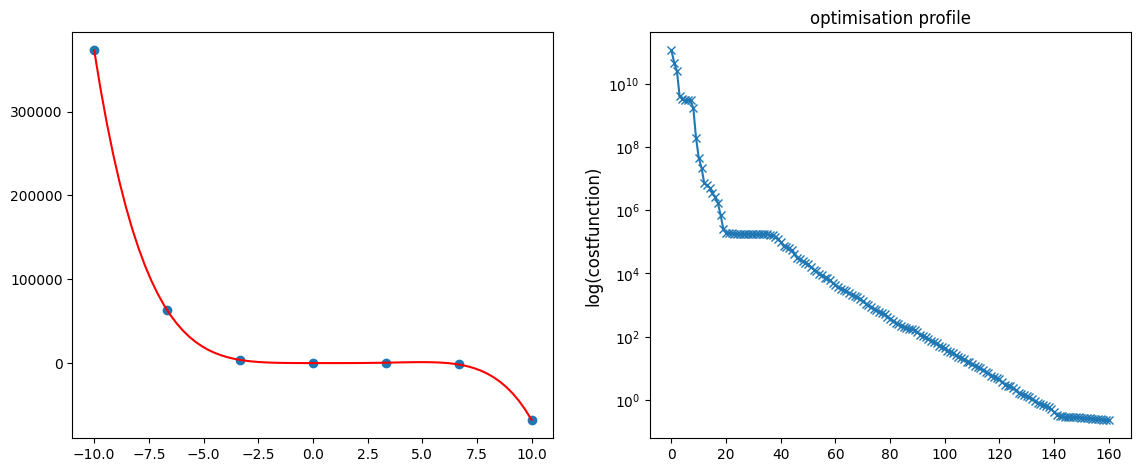

In [120]:
#
# Multiplication of two 3rd order polynomials
# 
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt

dp_cnt = 7
rand_norm_std = 10
np.random.seed(42)
#
# Generate synthetic data from a known polynomial
# (1) f = a1 x^3 + b1 x^2 + c1 x + d1
# (2) g = a2 x^3 + b2 x^2 + d2 5x + d2
# 
# Target
# h = f * g
#
# Generate 50 points between -10 and 10
#
x_data = np.linspace(-10, 10, dp_cnt) 
true_coeffs_1 = [2, -3, 4, -5] # True values of [a, b, c, d]
true_coeffs_2 = [0,-1,6,1]
true_coeffs = true_coeffs_1 + true_coeffs_2
y_data = np.polyval(true_coeffs_1, x_data)*np.polyval(true_coeffs_2,x_data) + np.random.normal(0, rand_norm_std, size=len(x_data))  # Add noise

#
# Define the loss function to minimize
#
def loss(params, x, y):
    # x <array>
    # y <array>
    a1, b1, c1, d1, a2, b2, c2, d2 = params
    y_pred = (a1 * x**3 + b1 * x**2 + c1 * x + d1) * (a2 * x**3 + b2 * x**2 + c2 * x + d2)
    return np.sum((y - y_pred) ** 2)  # Sum of squared errors (SSE)

optprofile = []
xkprofile = []
def record_optprofile(xk):
    optprofile.append(loss(xk,x_data,y_data))
    xkprofile.append(xk)
    
# Tolerance
xtol = 1e-6


# Initial guess for [a, b, c, d]
initial_guess_1 = [1, 1, 1, 1]
initial_guess_2 = [0,0,0,0]
initial_guess = initial_guess_1 + initial_guess_2

# Minimize the loss function
_maxiter = 500
result = opt.minimize(
    loss,
    initial_guess,
    args=(x_data, y_data),      # taking multiple inputs
    method='BFGS',
    tol = xtol,
    options={
        'disp':True,
        'maxiter': _maxiter,
    },
    callback=record_optprofile, # record_optprofile <callable> optional
)

# Extract optimized coefficients
optimized_coeffs = result.x
print("jac : ", result.jac)
print("Estimated coefficients:", optimized_coeffs)
print("True coefficients:", true_coeffs)
diff = true_coeffs - optimized_coeffs
print(f'diff : {diff}')
print(f'norm : {np.linalg.norm(diff)/len(diff)}')
print('-'*80)

#
# profile by the fitted data
#
dp_cnt_val = dp_cnt * 10
x_val_data = np.linspace(-10, 10, dp_cnt_val)
y_val_data = np.polyval(optimized_coeffs[0:4],x_val_data)*np.polyval(optimized_coeffs[4:],x_val_data)


# --------------------------------------------------------
fig, ax = plt.subplots(1,2)
cm = 1/2.54
xl,yl = 32,12
fig.set_size_inches((xl*cm,yl*cm))
plt.subplots_adjust(
left = 0.10,
bottom = 0.1,
right = 0.94,
top = 0.96,
wspace = 0.200,
hspace = 0.0
)
fs, lfs = 12, 14 #fonts

ax[0].plot(x_data,y_data, marker='o',linestyle='')
# add by the fitted dataset
ax[0].plot(x_val_data,y_val_data,linestyle='-',color='r')


# opt profile
ax[1].plot(optprofile,marker='x',linestyle='-')
ax[1].set_yscale('log')
ax[1].set_title('optimisation profile')
ax[1].set_ylabel('log(costfunction)',fontsize=fs)

plt.show()



In [110]:
import numpy as np

a = np.array([1,2])
b = np.array([3,4])
c = a*b
print(c)


val = [2, -3, 4, -5, 0, -1, 6, 1]
print(val[0:4])
print(val[4:])

[3 8]
[2, -3, 4, -5]
[0, -1, 6, 1]


jac :  [           nan            nan            nan            nan
 -2582.32827264 -2038.95471712   -12.56810841   -21.51008392]
Estimated coefficients: [ 2.00000000e+00 -3.00000000e+00  4.00000000e+00 -5.00000000e+00
  1.90359870e-05 -9.99875799e-01  5.99865675e+00  9.91134468e-01]
True coefficients: [2, -3, 4, -5, 0, -1, 6, 1]
diff : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.90359870e-05 -1.24201034e-04  1.34324805e-03  8.86553238e-03]
norm : 0.001120949429362488
--------------------------------------------------------------------------------


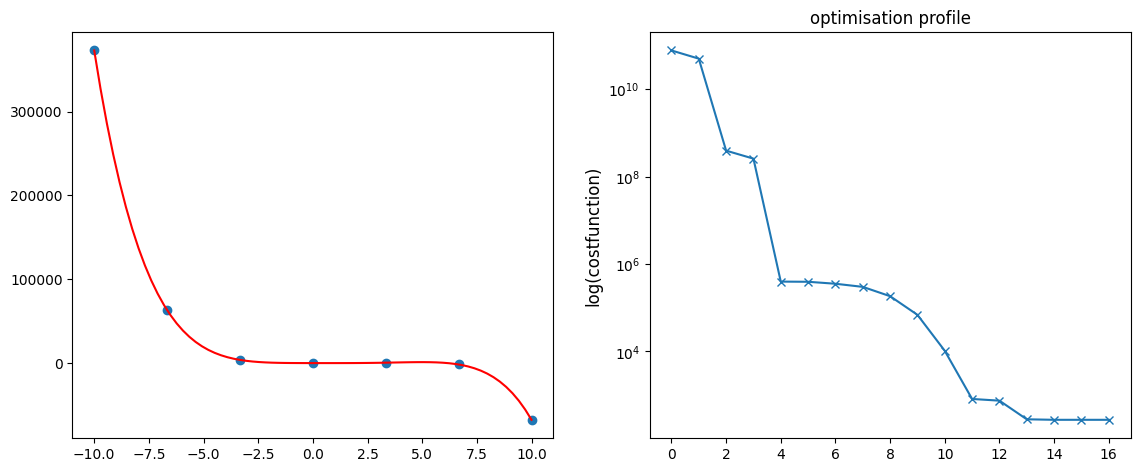

In [123]:
#
# Multiplication of two 3rd order polynomials - Applying Bounds
# 
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt

dp_cnt = 7
rand_norm_std = 10
np.random.seed(42)
#
# Generate synthetic data from a known polynomial
# (1) f = a1 x^3 + b1 x^2 + c1 x + d1
# (2) g = a2 x^3 + b2 x^2 + d2 5x + d2
# 
# Target
# h = f * g
#
# Generate 50 points between -10 and 10
#
x_data = np.linspace(-10, 10, dp_cnt) 
true_coeffs_1 = [2, -3, 4, -5] # True values of [a, b, c, d]
true_coeffs_2 = [0,-1,6,1]
true_coeffs = true_coeffs_1 + true_coeffs_2
y_data = np.polyval(true_coeffs_1, x_data)*np.polyval(true_coeffs_2,x_data) + np.random.normal(0, rand_norm_std, size=len(x_data))  # Add noise

#
# Define the loss function to minimize
#
def loss(params, x, y):
    # x <array>
    # y <array>
    a1, b1, c1, d1, a2, b2, c2, d2 = params
    y_pred = (a1 * x**3 + b1 * x**2 + c1 * x + d1) * (a2 * x**3 + b2 * x**2 + c2 * x + d2)
    return np.sum((y - y_pred) ** 2)  # Sum of squared errors (SSE)

optprofile = []
xkprofile = []
def record_optprofile(xk):
    optprofile.append(loss(xk,x_data,y_data))
    xkprofile.append(xk)
    
# Tolerance
xtol = 1e-6


# Initial guess for [a, b, c, d]
initial_guess_1 = [1, 1, 1, 1]
initial_guess_2 = [0,0,0,0]

initial_guess_1 = [2, -3, 4, -5]
initial_guess_2 = [0,0,0,0]
initial_guess = initial_guess_1 + initial_guess_2

#
# Applying Bounds
#
bounds = [ (2,2), (-3,-3), (4,4), (-5,-5), (None,None), (None,None), (None,None), (None,None) ]

# Minimize the loss function
_maxiter = 500
result = opt.minimize(
    loss,
    initial_guess,
    args=(x_data, y_data),      # taking multiple inputs
    bounds = bounds,
    method='L-BFGS-B',
    tol = xtol,
    options={
        'disp':True,
        'maxiter': _maxiter,
    },
    callback=record_optprofile, # record_optprofile <callable> optional
)

# Extract optimized coefficients
optimized_coeffs = result.x
print("jac : ", result.jac)
print("Estimated coefficients:", optimized_coeffs)
print("True coefficients:", true_coeffs)
diff = true_coeffs - optimized_coeffs
print(f'diff : {diff}')
print(f'norm : {np.linalg.norm(diff)/len(diff)}')
print('-'*80)

#
# profile by the fitted data
#
dp_cnt_val = dp_cnt * 10
x_val_data = np.linspace(-10, 10, dp_cnt_val)
y_val_data = np.polyval(optimized_coeffs[0:4],x_val_data)*np.polyval(optimized_coeffs[4:],x_val_data)


# --------------------------------------------------------
fig, ax = plt.subplots(1,2)
cm = 1/2.54
xl,yl = 32,12
fig.set_size_inches((xl*cm,yl*cm))
plt.subplots_adjust(
left = 0.10,
bottom = 0.1,
right = 0.94,
top = 0.96,
wspace = 0.200,
hspace = 0.0
)
fs, lfs = 12, 14 #fonts

ax[0].plot(x_data,y_data, marker='o',linestyle='')
# add by the fitted dataset
ax[0].plot(x_val_data,y_val_data,linestyle='-',color='r')


# opt profile
ax[1].plot(optprofile,marker='x',linestyle='-')
ax[1].set_yscale('log')
ax[1].set_title('optimisation profile')
ax[1].set_ylabel('log(costfunction)',fontsize=fs)

plt.show()

